<blockquote>
    <h1>Exercise 3.9</h1>
    <p>This question involves the use of multiple linear regression on the <code>Auto</code> data set.</p>
    <ol>
        <li>Produce a scatterplot matrix which includes all of the variables in the data set.</li>
        <li>Compute the matrix of correlations between the variables using the function <code>cor()</code>. You will need to exclude the $\mathrm{name}$ variable, which is qualitative.</li>
        <li>
            Use the <code>lm()</code> function to perform a multiple linear regression with $\mathrm{mpg}$ as the response and all the other variables except $\mathrm{name}$ as the predictors. Use the <code>summary()</code> function to print the results. Comment on the output. For instance:
            <ol>
                <li>Is there a relationship between the predictors and the response?</li>
                <li>Which predictors appear to have a statistically significant relationship to the response?</li>
                <li>What does the coefficient for the $\mathrm{year}$ variable suggest?</li>
            </ol>
        </li>
        <li>Use the <code>plot()</code> function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?</li>
        <li>Use the <code>*</code> and <code>:</code> symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?</li>
        <li>Try a few different transformations of the variables, such as $\log \left( X \right)$, $\sqrt{X}$, $X^2$. Comment on your findings.</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/usefulFunctions.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import statsmodels.api as sm
import statsmodels.formula.api as smf

<h2>Data Exploration</h2>
<p>We first read the comma-separated values (csv) <code>Auto</code> file into a pandas DataFrame, for which we will show the top five rows.</p>

In [2]:
df = pd.read_csv("../../DataSets/Auto/Auto.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<p>Since the $\mathrm{name}$ variable is qualitative, we will set it as an index of the DataFrame. Furthermore, we know from our <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a> for the <code>Auto</code> file that <code>horsepower</code> column contains $5$ missing values identified by the <code>'?'</code> string.</p>

In [3]:
df = df.set_index('name')
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
ford pinto,25.0,4,98.0,?,2046,19.0,71,1
ford maverick,21.0,6,200.0,?,2875,17.0,74,1
renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
renault 18i,34.5,4,100.0,?,2320,15.8,81,2


<p>As explained in the <a href="../../DataSets/Auto/Exploration.ipynb">Eploration notebook</a>, we will <i>coercively</i> convert the <code>horsepower</code> column from an <code>object</code> type to a <code>numeric</code> type using pandas <code>to_numeric()</code> method. This will cause all the <code>'?'</code> strings to be converted to <code>NaN</code> values. Finally, we will use the <code>dropna()</code> method to remove the rows with missing values.</p>

In [4]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


<h3>Exercise 3.9.1</h3>
<blockquote>
    <i>Produce a scatterplot matrix which includes all of the variables in the data set.</i>
</blockquote>

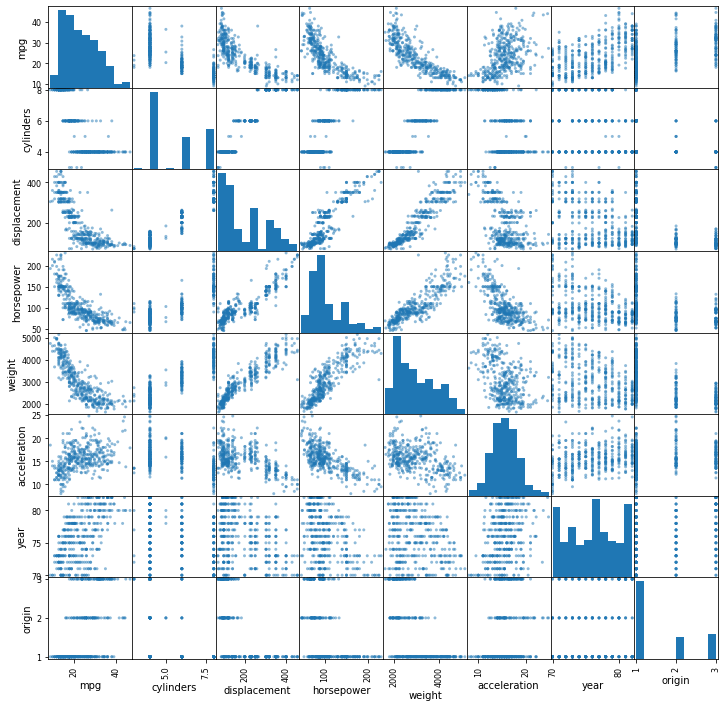

In [5]:
_ = pd.plotting.scatter_matrix(df, figsize=(12, 12))

<h3>Exercise 3.9.2</h3>
<blockquote>
    <i>Compute the matrix of correlations between the variables using the function <code>cor()</code>. You will need to exclude the $\mathrm{name}$ variable, which is qualitative.</i>
</blockquote>

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1,0.95,0.84,0.9,-0.5,-0.35,-0.57
displacement,-0.81,0.95,1,0.9,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.9,1,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.9,0.93,0.86,1,-0.42,-0.31,-0.59
acceleration,0.42,-0.5,-0.54,-0.69,-0.42,1,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1


<h3>Exercise 3.9.3</h3>
<blockquote>
    <i>Use the <code>lm()</code> function to perform a multiple linear regression with $\mathrm{mpg}$ as the response and all the other variables except $\mathrm{name}$ as the predictors. Use the <code>summary()</code> function to print the results. Comment on the output.</i>
</blockquote>


In [7]:
df.insert(0, 'Intercept', 1)
targetColumn = ['mpg']
descriptiveColumns = removeColumnsFromList(df, targetColumn)
X = df[descriptiveColumns]
Y = df[targetColumn]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          2.04e-139
Time:                        20:53:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h5>Exercise 3.9.3A</h5>
<blockquote>
    <i>Is there a relationship between the predictors and the response?</i>
</blockquote>
<p>Since the $F$-statistic is much larger than $1$ with a very small $p$ value, we can conclude that there is indeed a large probability that there is relationship between the response and at least one of the predictors.</p>

<h5>Exercise 3.9.3B</h5>
<blockquote>
    <i>Which predictors appear to have a statistically significant relationship to the response?</i>
</blockquote>
<p>Looking at the magnitude of the slope coefficients in combination with the $p$ values, we see that there is a significant chance that $\mathrm{cylinders}$ (perhaps), $\mathrm{displacement}$, $\mathrm{weight}$, $\mathrm{year}$ and $\mathrm{origin}$ predictors are related to the response variable.</p>

<h5>Exercise 3.9.3C</h5>
<blockquote>
    <i>What does the coefficient for the $\mathrm{year}$ variable suggest?</i>
</blockquote>
<p>For every year that the car is newer, the $\mathrm{mpg}$ is predicted to increase by $0.7508$.</p>

<h3>Exercise 3.9.4</h3>
<blockquote>
    <i>Use the <code>plot()</code> function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?</i>
</blockquote>


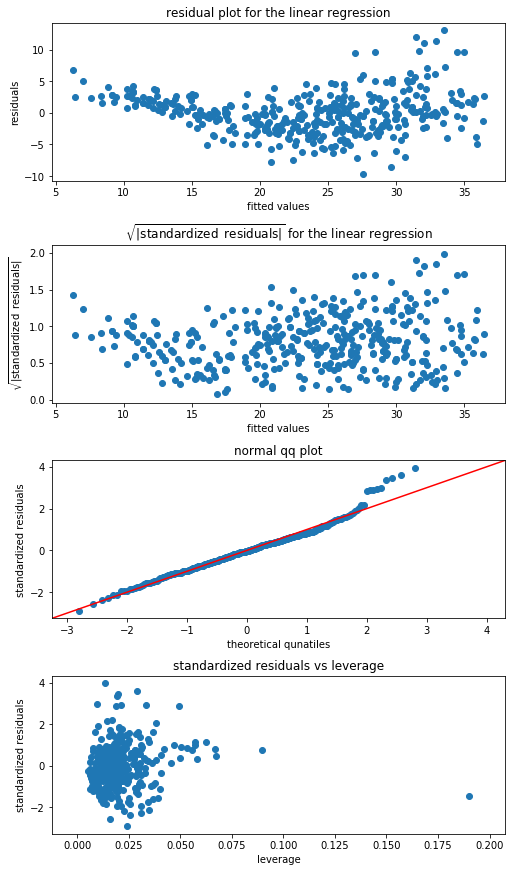

In [8]:
createResidualPlots(X, Y, fitted_model=fitted)

<p>The residual plots show that there is non-linear structure, indicating that the linear model is underfitting the data. The qq plot shows that the distribution of the standardized residuals is approximately normal except for the divergence at the right tail, indicating that the distibution is slightly skewed to the right. The leverage plot shows that there is one sample point with a unusual high leverage, although it is not an outlier</p>

<h3>Exercise 3.9.5</h3>
<blockquote>
    <i>Use the <code>*</code> and <code>:</code> symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?</li>
</blockquote>

<p>After having played with various interaction terms, I found that the following model assumptions give the best results:
\begin{equation}
    \begin{aligned}
        \mathrm{mpg} \approx & \beta_0 
                                + \beta_1 * \mathrm{cylinders} 
                                + \beta_2 * \mathrm{displacement}
                                + \beta_3 * \mathrm{weight} 
                                + \beta_4 * \mathrm{year} \\&
                                + \beta_5 * \mathrm{mpg} 
                                + \beta_6 * \mathrm{displacement} * \mathrm{weight}
                                + \beta_7 * \mathrm{displacement} * \mathrm{year} \,,
    \end{aligned}
\end{equation}

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     392.9
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          1.03e-160
Time:                        20:53:28   Log-Likelihood:                -976.39
No. Observations:                 392   AIC:                             1967.
Df Residuals:                     385   BIC:                             1995.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -36.3207      7.443     -4.880      0.000     -50.954     -21.687
cylinders               0.5092      0.294      1.734      0.084      -0.068       1.087
displacement            0.0788      0.037      2.138      0.033       0.006       0.151
weight                 -0.0100      0.001    -15.327      0.000      -0.011      -0.009
displacement:weight  1.971e-05   2.15e-06      9.183      0.000    1.55e-05    2.39e-05
year                    1.1774      0.091     12.968      0.000       0.999       1.356
displacement:year      -0.0021      0.000     -4.518      0.000      -0.003      -0.001
==============================================================================
Omnibus:                       69.080   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.630
Skew:                           0.808   Prob(JB):                     6.06e-45
Kurtosis:                       6.139   Cond. No.                     4.22e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

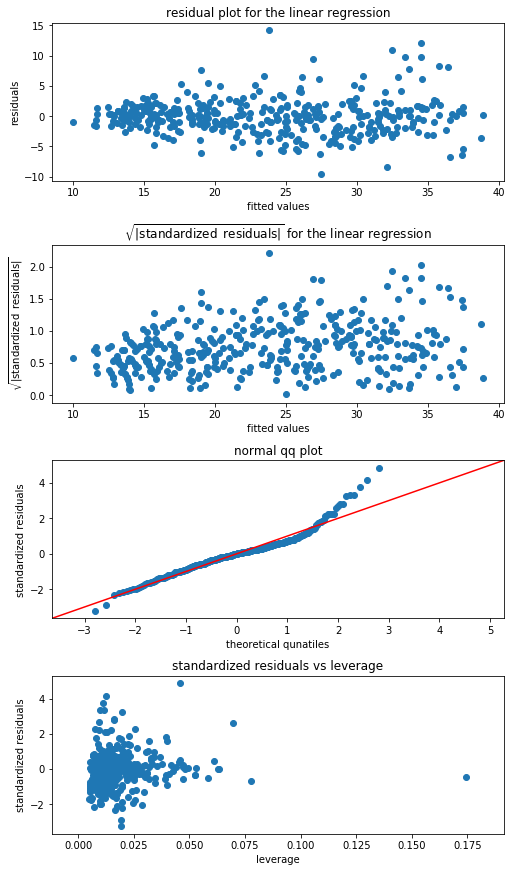

In [9]:
model = smf.ols(formula='mpg ~ cylinders + displacement*weight + displacement*year', data=df)  # https://www.statsmodels.org/dev/example_formulas.html# and https://stackoverflow.com/questions/33050104/difference-between-the-interaction-and-term-for-formulas-in-statsmodels-ols
fitted = model.fit()
fitted.summary()

df['displacement*weight'] = df['displacement'] * df['weight']
df['displacement*year'] = df['displacement'] * df['year']
targetColumn = ['mpg']
descriptiveColumns = ['Intercept', 'cylinders', 'displacement', 'weight', 'year', 
                      'displacement*weight', 'displacement*year']
X = df[descriptiveColumns]
Y = df[targetColumn]
createResidualPlots(X, Y, fitted_model=fitted)

The results show that all coefficients appears to be statistically significant as they have small $p$ values, with the $\mathrm{cylinders}$ and $\mathrm{displacement}$ coefficient having the highest $p$ values and lowest absolute $t$ values. The $R^2$ tells us that this linear model can explain $0.86 \%$ of the variance in $\mathrm{mpg}$ (and the adjusted $R^2$ is very similar). We also produce residual plots of this fit to gain more insight in our assumptions about the errors.

<h3>Exercise 3.9.6</h3>
<blockquote>
    <i>Try a few different transformations of the variables, such as $\log \left( X \right)$, $\sqrt{X}$, $X^2$. Comment on your findings.</li>
</blockquote>
<p>We are going to investigate such a transformation on the $\mathrm{displacement}$ variable because the regression results of Exercise 3.9.6 show that it has the highest $p$ value (we are ignoring the $\mathrm{cylinders}$ variable for this because it has a very low cardinality), so we might be able to improve those results. Let us first take a simple linear regression with $\mathrm{mpg}$ as the response and $\mathrm{displacement}$ as the predictor, and produce the associated residual plots.<p/>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     718.7
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.66e-90
Time:                        20:53:29   Log-Likelihood:                -1156.4
No. Observations:                 392   AIC:                             2317.
Df Residuals:                     390   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1206      0.494     71.033      0.000      34.149      36.093
displacement    -0.0601      0.002    -26.808      0.000      -0.064      -0.056
==============================================================================
Omnibus:                       41.308   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.139
Skew:                           0.709   Prob(JB):                     5.30e-14
Kurtosis:                       4.317   Cond. No.                         466.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

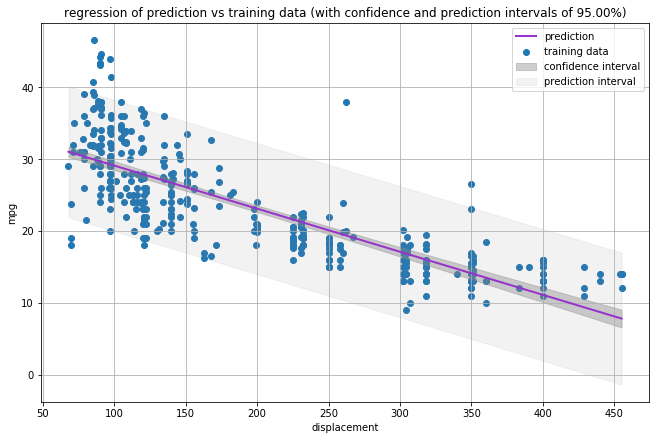

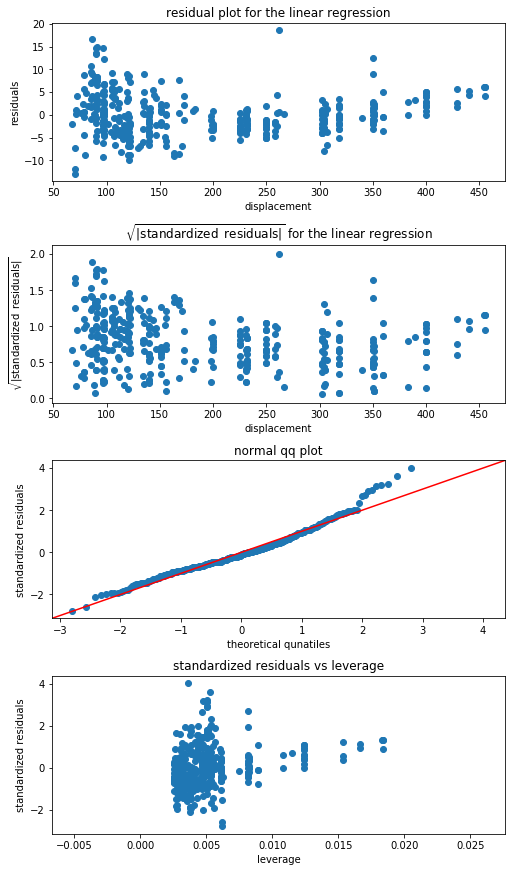

In [10]:
independent = 'displacement'
X = df[['Intercept', independent]]
Y = df[['mpg']]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()
createSimpleLinearRegressionPlot(X=X, Y=Y, fitted_model=fitted, independent=independent, dependent='mpg')
createResidualPlots(X, Y, fitted_model=fitted)

<p>The residual plots show that there is a clear non-linear structure in the residuals, to the $\mathrm{displacement}$ variable is a good candidate to apply a non-linear transformation. We start with a $\log$ transformation.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     853.4
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          3.15e-100
Time:                        20:53:31   Log-Likelihood:                -1133.9
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     390   BIC:                             2280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           85.6906      2.142     40.001      0.000      81.479      89.902
log_displacement   -12.1385      0.416    -29.212      0.000     -12.955     -11.322
==============================================================================
Omnibus:                       40.229   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.126
Skew:                           0.516   Prob(JB):                     8.12e-22
Kurtosis:                       5.209   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

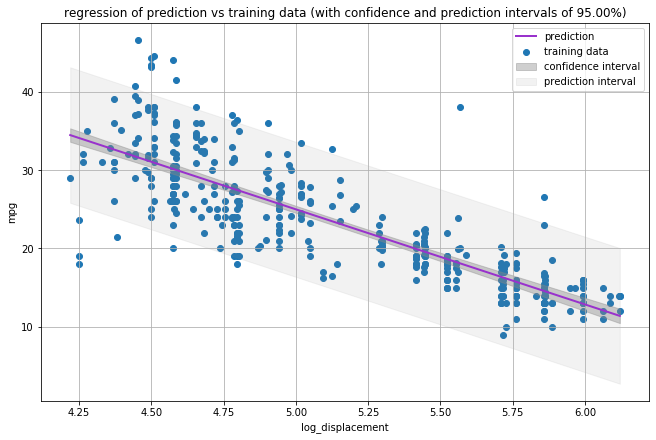

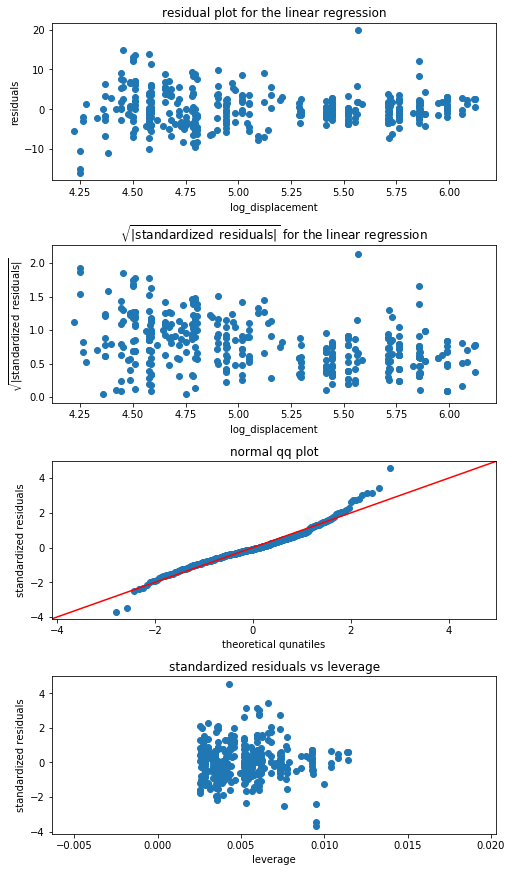

In [11]:
independent = 'log_displacement'
df[independent] = np.log(df['displacement'])
X = df[['Intercept', independent]]
Y = df[['mpg']]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()
createSimpleLinearRegressionPlot(X=X, Y=Y, fitted_model=fitted, independent=independent, dependent='mpg')
createResidualPlots(X, Y, fitted_model=fitted)

<p>Let us now test $\sqrt{\mathrm{displacement}}$ as independent variable.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     808.5
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           4.13e-97
Time:                        20:53:32   Log-Likelihood:                -1141.2
No. Observations:                 392   AIC:                             2286.
Df Residuals:                     390   BIC:                             2294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            47.1184      0.862     54.632      0.000      45.423      48.814
sqrt_displacement    -1.7588      0.062    -28.434      0.000      -1.880      -1.637
==============================================================================
Omnibus:                       41.554   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.037
Skew:                           0.625   Prob(JB):                     1.87e-17
Kurtosis:                       4.777   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

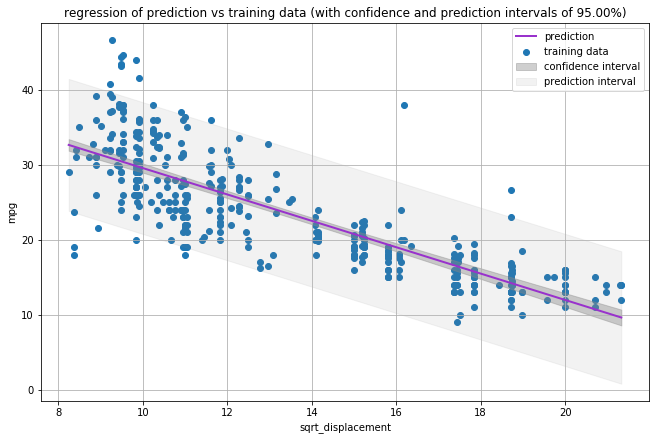

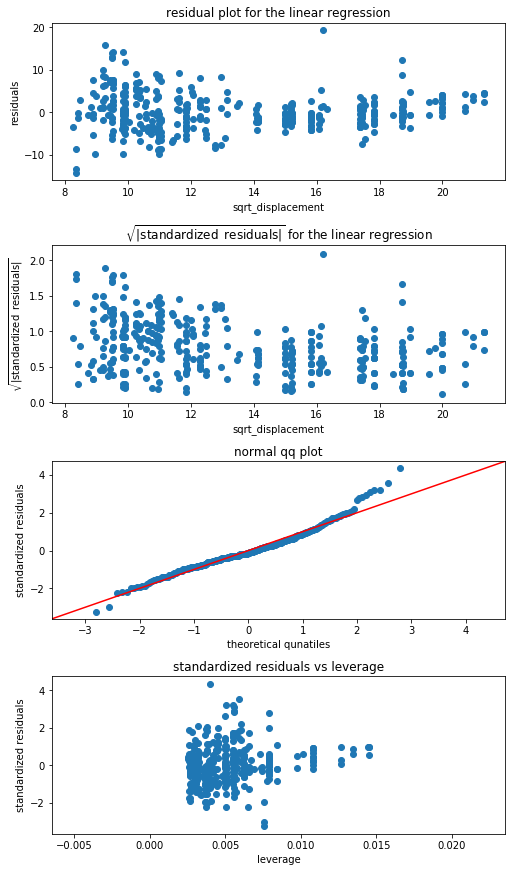

In [12]:
independent = 'sqrt_displacement'
df[independent] = df['displacement']**(1/2)
X = df[['Intercept', independent]]
Y = df[['mpg']]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()
createSimpleLinearRegressionPlot(X=X, Y=Y, fitted_model=fitted, independent=independent, dependent='mpg')
createResidualPlots(X, Y, fitted_model=fitted)

<p>We finnaly try $\mathrm{displacement}^2$ as independent variable.</p>

,squared_displacement,displacement
name,,
chevrolet chevelle malibu,94249.0,307.0
buick skylark 320,122500.0,350.0
plymouth satellite,101124.0,318.0
amc rebel sst,92416.0,304.0
ford torino,91204.0,302.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.08e-72
Time:                        20:53:34   Log-Likelihood:                -1197.6
No. Observations:                 392   AIC:                             2399.
Df Residuals:                     390   BIC:                             2407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               29.2577      0.366     79.923      0.000      28.538      29.977
squared_displacement    -0.0001   5.29e-06    -22.554      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       38.414   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.066
Skew:                           0.792   Prob(JB):                     6.02e-11
Kurtosis:                       3.610   Cond. No.                     9.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

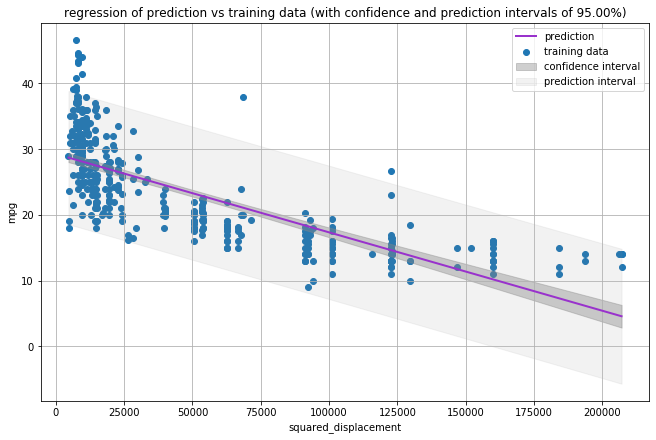

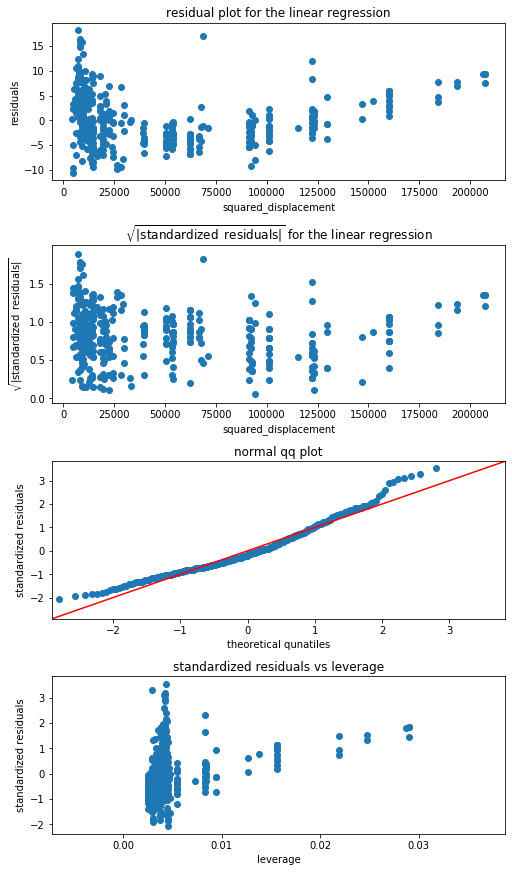

In [13]:
independent = 'squared_displacement'
df[independent] = df['displacement']**2
df[[independent, 'displacement']].head()
X = df[['Intercept', independent]]
Y = df[['mpg']]
model = sm.OLS(Y, X)
fitted = model.fit()
fitted.summary()
createSimpleLinearRegressionPlot(X=X, Y=Y, fitted_model=fitted, independent=independent, dependent='mpg')
createResidualPlots(X, Y, fitted_model=fitted)

<p>From these fits, it appears that $\log$ transformation yields the best results. Both the (adjusted) $R^2$ and the $F$-statistic have improved due to the non-linear transformation. Furthermore, the residual of the regression of the transformed variable seem to be more randomly distributed. However, they also show that there is strong evidence of heteroskedasticity. It also seems that the transformed variables have less observations with high leverage.</p>
<p>We can now try our interaction model of Exercise 3.9.5 with the $\mathrm{displacement}$ variable replaced with the $\log\left(\mathrm{displacement}\right)$ variable and compare results.</p>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     394.6
Date:                Mon, 30 Dec 2019   Prob (F-statistic):          4.99e-161
Time:                        20:53:35   Log-Likelihood:                -975.65
No. Observations:                 392   AIC:                             1965.
Df Residuals:                     385   BIC:                             1993.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -119.6792     35.716     -3.351      0.001    -189.903     -49.456
cylinders                  -0.0107      0.296     -0.036      0.971      -0.593       0.571
log_displacement           19.6144      7.038      2.787      0.006       5.777      33.451
weight                     -0.0240      0.003     -8.226      0.000      -0.030      -0.018
log_displacement:weight     0.0035      0.001      6.769      0.000       0.002       0.004
year                        2.9620      0.442      6.698      0.000       2.093       3.831
log_displacement:year      -0.4261      0.088     -4.857      0.000      -0.599      -0.254
==============================================================================
Omnibus:                       64.168   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.645
Skew:                           0.730   Prob(JB):                     2.69e-44
Kurtosis:                       6.187   Cond. No.                     4.19e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

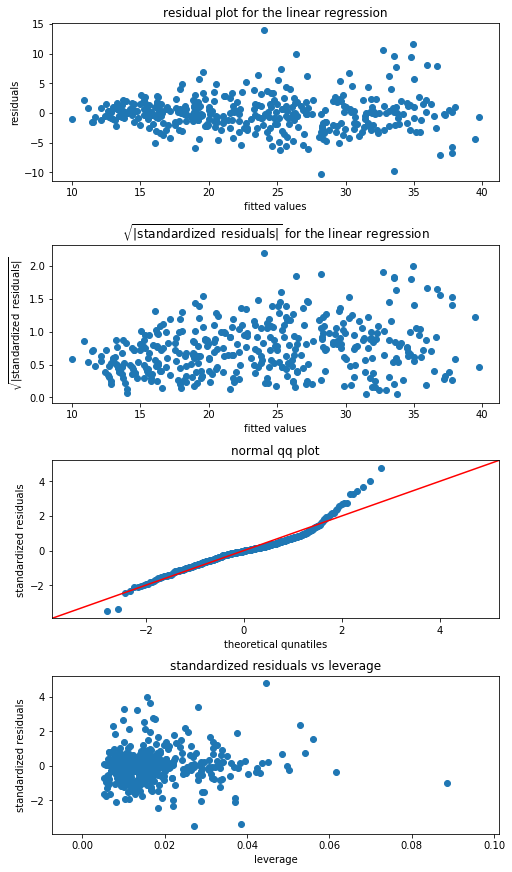

In [14]:
model = smf.ols(formula='mpg ~ cylinders + log_displacement*weight + log_displacement*year', data=df)  # https://www.statsmodels.org/dev/example_formulas.html# and https://stackoverflow.com/questions/33050104/difference-between-the-interaction-and-term-for-formulas-in-statsmodels-ols
fitted = model.fit()
fitted.summary()

df['log_displacement*weight'] = df['log_displacement'] * df['weight']
df['log_displacement*year'] = df['log_displacement'] * df['year']
targetColumn = ['mpg']
descriptiveColumns = ['Intercept', 'cylinders', 'log_displacement', 'weight', 'year', 
                      'log_displacement*weight', 'log_displacement*year']
X = df[descriptiveColumns]
Y = df[targetColumn]
createResidualPlots(X, Y, fitted_model=fitted)

<p>This shows that the adjusted $R^2$ has increased by $1 \%$ and the $F$-statistic has also increased slightly. Furthermore, we see that the $p$ value of the $\mathrm{log\_displacement}$ coefficient has decreased compared to the $p$ value of the $\mathrm{displacement}$ coefficient of our original interaction model.</p>